<a href="https://colab.research.google.com/github/IsraMasterOne/Ciencia-de-Datos-ConPython/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto 2 Ciencia de Datos con Python Israel Fuentes Saavedra

In [17]:
#Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import missingno as msno

In [18]:
#Leemos el archivo
df=pd.read_csv("/content/autos.csv",sep=';')

In [19]:
#Función para limpair los datos con método backfill
def limpieza(datos):
  if df.isnull().values.any():
    df.backfill(inplace=True)
    print("Se limpiaron los datos nulos")
  else:
    print("No se tuvo que hacer limpieza de datos")

In [20]:
#Limpiamos los datos del archivo
limpieza(df)

Se limpiaron los datos nulos


In [21]:
#Checamos si hay datos nulos
df.isnull().values.any()

False

In [22]:
#Funcion para la creacion de nuevas variables numéricas
def Nuevasvariables(datos,var1,var2):
  datos['Log']=np.log10(var1/var2)
  datos['Raiz_Exp']=(np.sqrt(var1)*np.exp(var2))/200
  
  datos['Condicion']=np.where(var1>var2,5,3)
  datos['Log_n']=(1/np.log(np.where(var1/var2==1,1.005,var1/var2)))*100
  datos['Pot']=(np.power(var2,2))/var1


In [23]:
#Se crean las nuevas variables con las columnas Millas por Galon y Aceleracion
Nuevasvariables(df,df['Millas_Por_Galon'],df['Aceleracion'])
df

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Log,Raiz_Exp,Condicion,Log_n,Pot
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,0.176091,3.452551e+03,5,246.630346,8.000000
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,0.115393,1.911623e+03,5,376.359836,8.816667
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,0.213880,1.270122e+03,5,203.055380,6.722222
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,0.124939,3.255096e+03,5,347.605950,9.000000
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,0.209260,7.486633e+02,5,207.538596,6.485294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,0.238239,1.547554e+05,5,182.293487,9.013333
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,0.252518,1.600813e+09,5,171.985848,13.753636
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,0.440692,3.085752e+03,5,98.548304,4.205000
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,0.177645,3.165384e+06,5,244.473117,12.355714


In [24]:
#Se llama la funcion limpieza para checar si hay que limpiar datos
limpieza(df)

No se tuvo que hacer limpieza de datos


In [25]:
#Creación de variables cualitativas
def VariablesCualitativas(datos,var):
  New_Col="Cualitativa_"+var.name
  media=var.mean()
  desv=var.std()
  mediap=media+1*desv
  median=media-1*desv
  print(mediap)
  print(median)
  conditions=[(var>=mediap),(var<mediap) & (var>median),(var<=median)]
  choice=['Alto','Medio','Bajo']
  datos[New_Col]=np.select(conditions,choice,0)


In [26]:
#Creamos tres variables cualatativas
VariablesCualitativas(df,df['Pot'])
VariablesCualitativas(df,df['Log'])
VariablesCualitativas(df,df['Log_n'])

15.667173926195726
6.890172384740851
0.29184374883143704
0.030051556526625833
3793.1014742944994
-2547.833075882962


In [27]:
df

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Log,Raiz_Exp,Condicion,Log_n,Pot,Cualitativa_Pot,Cualitativa_Log,Cualitativa_Log_n
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,0.176091,3.452551e+03,5,246.630346,8.000000,Medio,Medio,Medio
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,0.115393,1.911623e+03,5,376.359836,8.816667,Medio,Medio,Medio
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,0.213880,1.270122e+03,5,203.055380,6.722222,Bajo,Medio,Medio
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,0.124939,3.255096e+03,5,347.605950,9.000000,Medio,Medio,Medio
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,0.209260,7.486633e+02,5,207.538596,6.485294,Bajo,Medio,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,0.238239,1.547554e+05,5,182.293487,9.013333,Medio,Medio,Medio
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,0.252518,1.600813e+09,5,171.985848,13.753636,Medio,Medio,Medio
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,0.440692,3.085752e+03,5,98.548304,4.205000,Bajo,Alto,Medio
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,0.177645,3.165384e+06,5,244.473117,12.355714,Medio,Medio,Medio


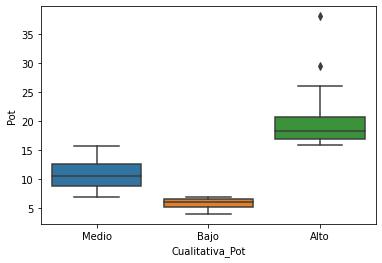

In [28]:
#Grafico de Boxplot de Potencia contra Variable Cualitativa Pot
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(
        x     = 'Cualitativa_Pot',
        y     = 'Pot',
        data  = df,
        ax    = ax
    )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


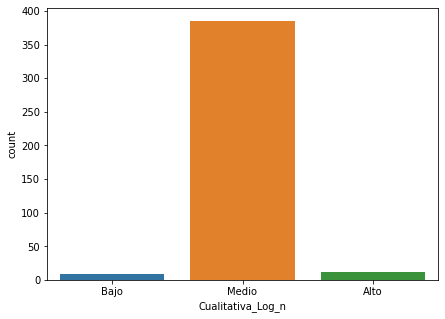

In [29]:
 #Gráfico de barras de conteo de variable cualitativa Log_n
 df['Cualitativa_Log_n'].value_counts()

 plt.figure(figsize=(7,5))
sns.countplot(df['Cualitativa_Log_n'],order=('Bajo','Medio','Alto'))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


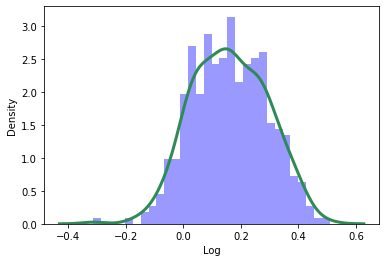

In [30]:
#Gráfico de histograma con curva de la variable Log
sns.distplot(df['Log'],bins=30,kde_kws={"color":"seagreen", "lw":3 }, hist_kws={ "color": "b" }) 

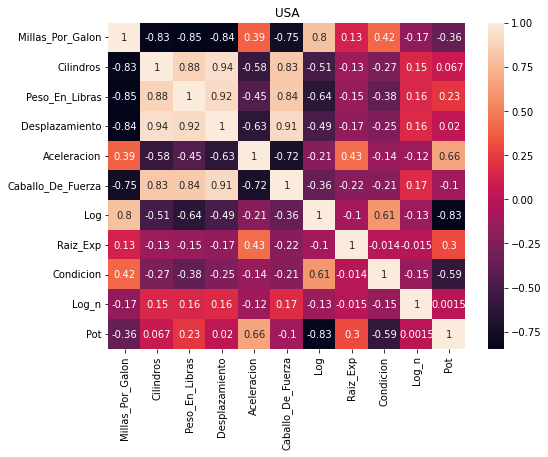

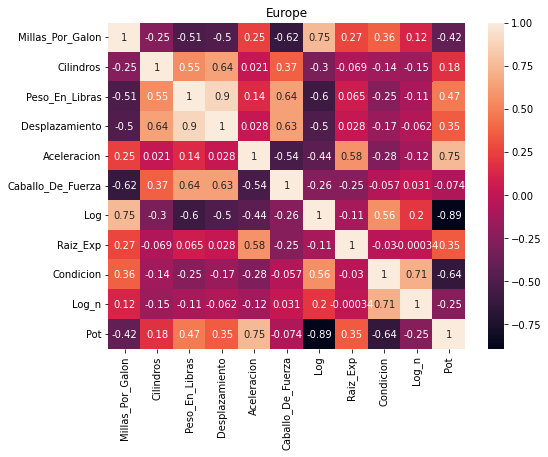

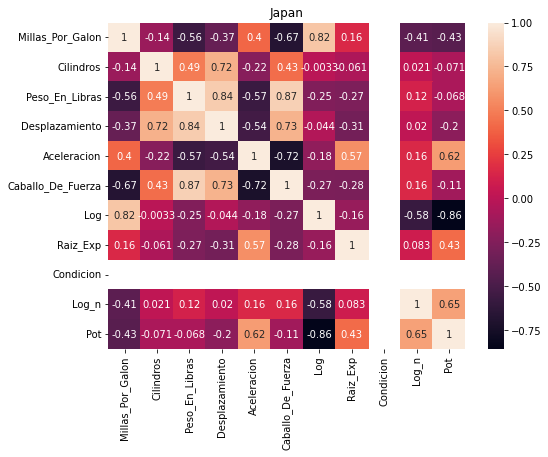

In [31]:
#Creacion de mapa de calor para correlación de variables numéricas por país
col_num=[]
for i in dict(df.dtypes).keys():
  if dict(df.dtypes)[i]=='float64' or dict(df.dtypes)[i]=='int64':
    col_num.append(i)
paises=list(df['Pais_Origen'].unique())
for i in paises:
  sub_df=df.loc[df['Pais_Origen'] ==i,col_num] 
  plt.figure(figsize=(8,6))
  ax=plt.axes()
  correlacion = sub_df.corr()

  sns.heatmap(correlacion,
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            ax=ax,
            annot = True
            )
  ax.set_title(i)